# CAMS Data Visualization Example - Chart
## Description
This script illustrates some examples to visualize the CAMS data in charts. 

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from Function import myPlot

cwd = os.getcwd()
cwd_CAMS = cwd + "\\CAMS"
cwd_NUTS = cwd + "\\NUTS"
cwd_CAMS_2021 = cwd_CAMS + "\\2021"
cwd_CAMS_2021_NO2 = cwd_CAMS_2021 + "\\NO2"
cwd_CAMS_2021_O3 = cwd_CAMS_2021 + "\\O3"
cwd_CAMS_2021_PM10 = cwd_CAMS_2021 + "\\PM10"
cwd_CAMS_2021_PM25 = cwd_CAMS_2021 + "\\PM25"

## Data Visualization - Italy - Daily Concentration of PM 10 in Jan 2021

In [4]:
# Import xarray data
ds = xr.open_dataset(cwd_CAMS_2021_PM10 + '\\Edit_PM10202101.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 119, latitude: 116, time: 744)
Coordinates:
  * longitude  (longitude) float32 6.65 6.75 6.85 6.95 ... 18.25 18.35 18.45
  * latitude   (latitude) float32 47.05 46.95 46.85 46.75 ... 35.75 35.65 35.55
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Data variables:
    pm10_conc  (time, latitude, longitude) float32 ...

In [5]:
# Calculate the average of the entire bounding box, as a result of which we obtain a dataset only contains timestamp and its corresponding concentration, which is the average of the entire bounding box. 
ds_mean_bounding = ds.mean(dim='longitude')
ds_mean_bounding = ds_mean_bounding.mean(dim='latitude')
ds_mean_bounding

<xarray.Dataset>
Dimensions:    (time: 744)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Data variables:
    pm10_conc  (time) float32 12.62 12.15 11.75 11.4 ... 13.46 13.75 13.99 13.9

In [18]:
# Create a new dataset by calculating the average of each day
ds_new = ds_mean_bounding.assign_coords({'day': ds_mean_bounding.time.dt.day}).groupby('day').mean(dim='time')
ds_new

<xarray.Dataset>
Dimensions:    (day: 31)
Coordinates:
  * day        (day) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
Data variables:
    pm10_conc  (day) float32 10.14 9.891 8.269 9.433 ... 13.41 15.78 16.5 12.68

In [23]:
# Convert the dataset to dataarray
da = ds_new.to_array().mean(dim='variable')
da

<xarray.DataArray (day: 31)>
array([10.142185 ,  9.8912   ,  8.269458 ,  9.432591 ,  9.709375 ,
       12.673691 , 19.591345 , 21.222136 , 25.847092 , 21.44169  ,
       17.407091 , 15.3283205, 15.819285 , 16.119843 , 14.684169 ,
       12.434911 , 14.395587 , 13.6903   , 13.933589 , 13.73954  ,
       18.143919 , 18.333454 , 12.663453 , 11.810478 , 10.552485 ,
       10.520466 , 11.080762 , 13.406192 , 15.775847 , 16.495579 ,
       12.680615 ], dtype=float32)
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31

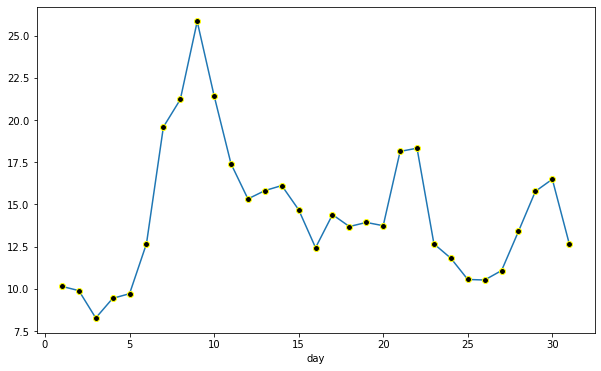

In [87]:
da.plot(marker='o',markerfacecolor='black',markeredgecolor='yellow',figsize=(10,6))

In [35]:
# Convery to DataFrame
df = ds_new.to_dataframe().reset_index().rename(columns={'pm10_conc': 'PM10', 'day': 'Day'})
df.head()

,Day,PM10
0,1,10.142185
1,2,9.891200
2,3,8.269458
3,4,9.432591
4,5,9.709375


In [40]:
# Add threshold column
threshold = myPlot.plot_Threshold('PM10','Daily')
df['PM10 Threshold'] = np.ones((len(df)))*threshold
df.head()

,Day,PM10,PM10 Threshold
0,1,10.142185,45.0
1,2,9.891200,45.0
2,3,8.269458,45.0
3,4,9.432591,45.0
4,5,9.709375,45.0


<AxesSubplot:xlabel='Day'>

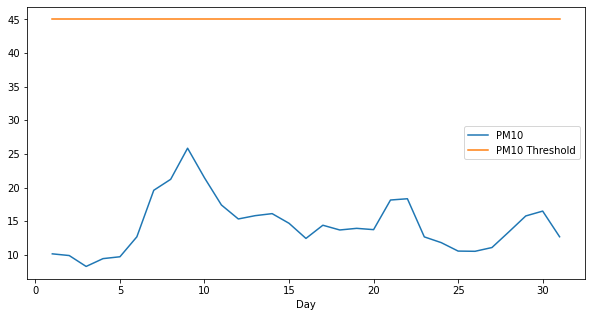

In [95]:
# Plot directly with Pandas
df.plot(x='Day',y=['PM10','PM10 Threshold'], figsize=(10,5))

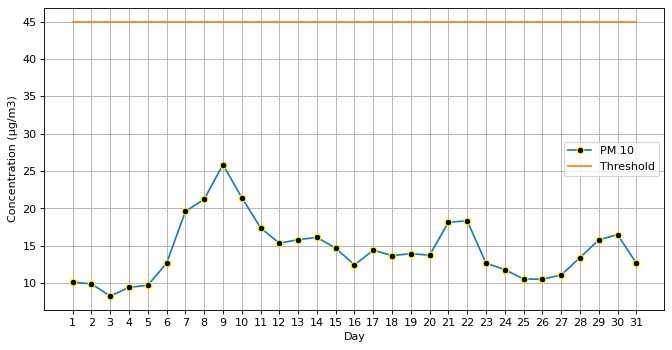

In [106]:
# Plot with Matplot
plt.figure(figsize=(10,5),dpi=80)
plt.plot(df['Day'], df['PM10'], marker='o', markerfacecolor='black', markeredgecolor='yellow', label='PM 10')
plt.plot(df['Day'], df['PM10 Threshold'], label='Threshold')
plt.xticks(range(1,32))
plt.xlabel('Day')
plt.ylabel('Concentration (μg/m3)')
plt.legend()
plt.grid()

## Data Visualization - Italy - Distribution of Hourly Concentration of PM 10 in Jan 2021

In [50]:
ds_mean_bounding

<xarray.Dataset>
Dimensions:    (time: 744)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Data variables:
    pm10_conc  (time) float32 12.62 12.15 11.75 11.4 ... 13.46 13.75 13.99 13.9

In [55]:
df_hour = ds_mean_bounding.to_dataframe().reset_index().rename(columns={'pm10_conc': 'PM10', 'time': 'Time'})
df_hour.head()

,Time,PM10
0,2021-01-01 00:00:00,12.623130
1,2021-01-01 01:00:00,12.153484
2,2021-01-01 02:00:00,11.754935
3,2021-01-01 03:00:00,11.397635
4,2021-01-01 04:00:00,10.884490


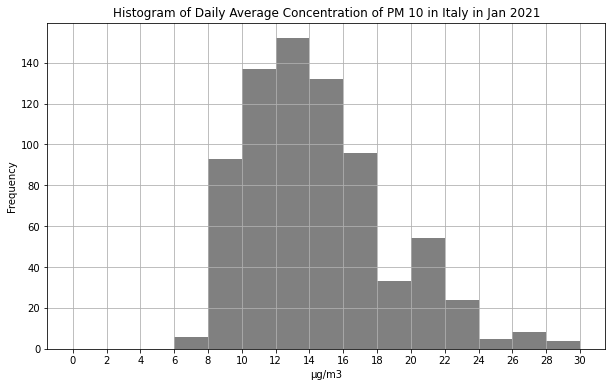

In [79]:
# Create a custom histogram
ax = df_hour['PM10'].plot(kind='hist',color='Grey',bins=range(0,32,2),figsize=(10, 6), title='Histogram of Daily Average Concentration of PM 10 in Italy in Jan 2021')
ax.set_xticks(range(0,32,2))
ax.set_xlabel('μg/m3')
plt.grid()